<a href="https://colab.research.google.com/github/ClickerDG/ml_dropout/blob/main/ml_dropout2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завантажуємо інструменти та бібліотеки, Keras та TensorFlow

In [57]:
import tensorflow as tf
from tensorflow import keras

Завантажуємо дата-сет FashionMNIST та поділяємо дані на тестові, тренувальні та валідаційні

In [60]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
size = 700
epochs_size = 600
train_labels = train_labels[:size]
test_labels = test_labels[:size]
train_images = train_images[:size] /  255.0
test_images = test_images[:size] / 255.0
validation_images = train_images[:size]
validation_labels = train_labels[:size]

Створюємо свою модель без шару Dropout

In [61]:
class CustomModel(keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.input_layer = keras.layers.Flatten(input_shape=(28,28))
        self.hidden1 = keras.layers.Dense(200, activation='relu')
        self.hidden2 = keras.layers.Dense(100, activation='relu')
        self.hidden3 = keras.layers.Dense(60, activation='relu')
        self.output_layer = keras.layers.Dense(10, activation='softmax')
    
    def call(self, input, training=None):
        input_layer = self.input_layer(input)
        hidden1 = self.hidden1(input_layer)
        hidden2 = self.hidden2(hidden1)
        hidden3 = self.hidden3(hidden2)
        output_layer = self.output_layer(hidden3)
        return output_layer

Завантажуємо розроблену модель та ініціалізуємо оптимізатори та гіперпараметри

In [72]:
model = CustomModel()
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Тренуємо модель

In [73]:
history = model.fit(train_images, train_labels, epochs=epochs_size, validation_data=(validation_images, validation_labels))

Epoch 1/600
22/22 [==============================] - 1s 14ms/step - loss: 2.2169 - accuracy: 0.1943 - val_loss: 2.0932 - val_accuracy: 0.3043
Epoch 2/600
22/22 [==============================] - 0s 6ms/step - loss: 2.0074 - accuracy: 0.3943 - val_loss: 1.8999 - val_accuracy: 0.4600
Epoch 3/600
22/22 [==============================] - 0s 6ms/step - loss: 1.8180 - accuracy: 0.4986 - val_loss: 1.7083 - val_accuracy: 0.5229
Epoch 4/600
22/22 [==============================] - 0s 8ms/step - loss: 1.6290 - accuracy: 0.5443 - val_loss: 1.5217 - val_accuracy: 0.5900
Epoch 5/600
22/22 [==============================] - 0s 6ms/step - loss: 1.4543 - accuracy: 0.6186 - val_loss: 1.3618 - val_accuracy: 0.6500
Epoch 6/600
22/22 [==============================] - 0s 6ms/step - loss: 1.3136 - accuracy: 0.6457 - val_loss: 1.2371 - val_accuracy: 0.6486
Epoch 7/600
22/22 [==============================] - 0s 8ms/step - loss: 1.2015 - accuracy: 0.6457 - val_loss: 1.1313 - val_accuracy: 0.6714
Epoch 8/600


Протестуємо на тестовому дата-сеті

In [74]:
model.evaluate(test_images, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1.1892 - accuracy: 0.7800


[1.189217209815979, 0.7799999713897705]

Створюємо свою модель за шаром Dropout

In [75]:
class CustomModelDO(keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.input_layer = keras.layers.Flatten(input_shape=(28,28))
        self.hidden1 = keras.layers.Dense(200, activation='relu')
        self.hidden2 = keras.layers.Dense(100, activation='relu')
        self.hidden3 = keras.layers.Dense(60, activation='relu')
        self.output_layer = keras.layers.Dense(10, activation='softmax')
        self.dropout_layer = keras.layers.Dropout(rate=0.3)
    
    def call(self, input, training=None):
        input_layer = self.input_layer(input)
        input_layer = self.dropout_layer(input_layer)
        hidden1 = self.hidden1(input_layer)
        hidden1 = self.dropout_layer(hidden1, training=training)
        hidden2 = self.hidden2(hidden1)
        hidden2 = self.dropout_layer(hidden2, training=training)
        hidden3 = self.hidden3(hidden2)
        hidden3 = self.dropout_layer(hidden3, training=training)
        output_layer = self.output_layer(hidden3)
        return output_layer

Завантажуємо розроблену модель та ініціалізуємо оптимізатори та гіперпараметри

In [76]:
modelDO = CustomModelDO()
modelDO.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

Тренуємо модель

In [77]:
historyDO = modelDO.fit(train_images, train_labels, epochs=epochs_size, validation_data=(validation_images, validation_labels))

Epoch 1/600
22/22 [==============================] - 1s 14ms/step - loss: 2.4110 - accuracy: 0.1057 - val_loss: 2.2307 - val_accuracy: 0.1500
Epoch 2/600
22/22 [==============================] - 0s 7ms/step - loss: 2.2848 - accuracy: 0.1500 - val_loss: 2.1592 - val_accuracy: 0.3086
Epoch 3/600
22/22 [==============================] - 0s 6ms/step - loss: 2.2228 - accuracy: 0.1814 - val_loss: 2.0844 - val_accuracy: 0.4086
Epoch 4/600
22/22 [==============================] - 0s 8ms/step - loss: 2.2054 - accuracy: 0.1900 - val_loss: 2.0093 - val_accuracy: 0.4786
Epoch 5/600
22/22 [==============================] - 0s 8ms/step - loss: 2.1281 - accuracy: 0.2243 - val_loss: 1.9333 - val_accuracy: 0.4714
Epoch 6/600
22/22 [==============================] - 0s 7ms/step - loss: 2.0377 - accuracy: 0.2771 - val_loss: 1.8384 - val_accuracy: 0.4871
Epoch 7/600
22/22 [==============================] - 0s 8ms/step - loss: 1.9275 - accuracy: 0.3114 - val_loss: 1.7434 - val_accuracy: 0.4957
Epoch 8/600


Протестуємо на тестовому дата-сеті

In [78]:
modelDO.evaluate(test_images, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.8014


[0.5791181921958923, 0.8014285564422607]

Побудуємо графік залежності loss та accuracy параметрів від епохи для train та validation дата-сетів для моделей

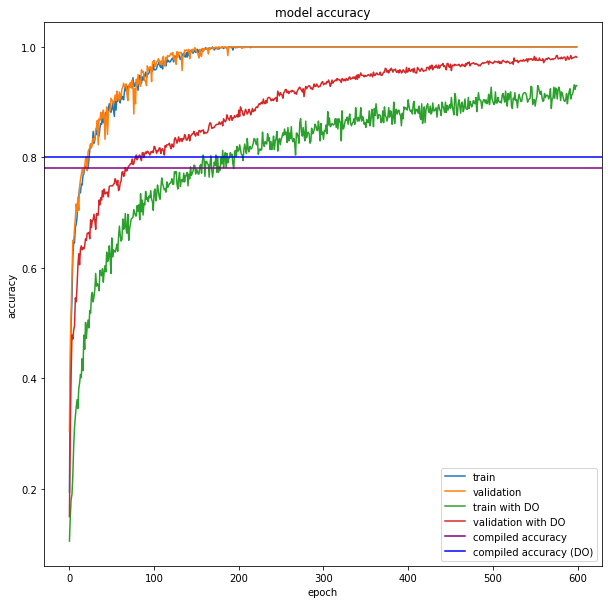

<Figure size 425.197x283.465 with 0 Axes>

In [113]:
from matplotlib import pyplot as plt

def cm_to_inch(value):
    return value/2.54

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(historyDO.history['accuracy'])
plt.plot(historyDO.history['val_accuracy'])
plt.axhline(y=0.78, color='purple')
plt.axhline(y=0.8014, color='b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'train with DO', 'validation with DO', 'compiled accuracy', 'compiled accuracy (DO)'], loc='lower right')
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))
plt.show()

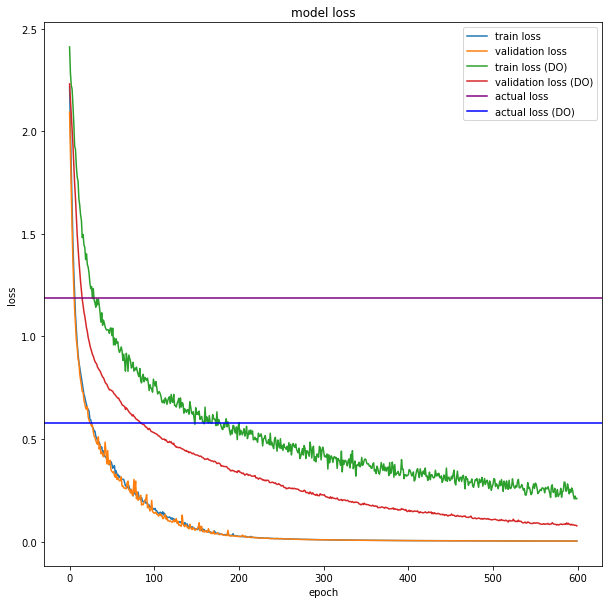

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(historyDO.history['loss'])
plt.plot(historyDO.history['val_loss'])
plt.axhline(y=1.1892, color='purple')
plt.axhline(y=0.5791, color='b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss', 'train loss (DO)', 'validation loss (DO)', 'actual loss', 'actual loss (DO)'], loc='upper right')
plt.show()